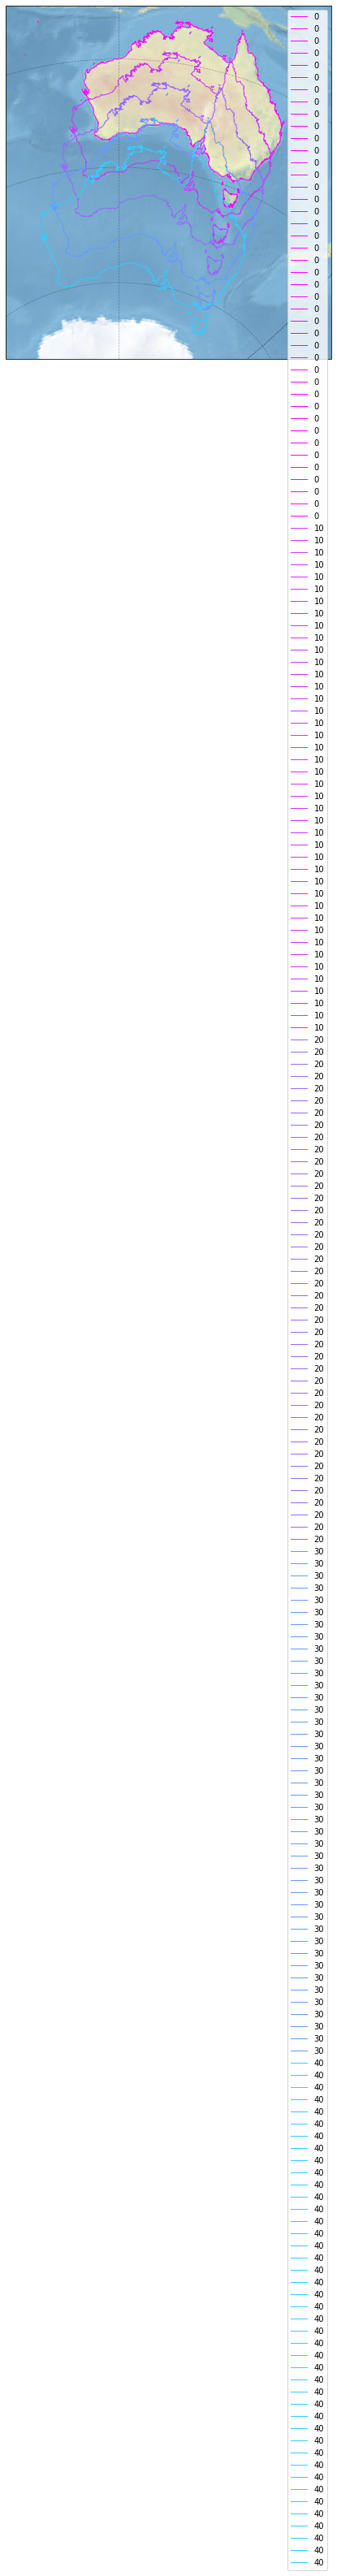

In [23]:
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import pygplates

my_cmap = cm.get_cmap('cool_r')

def main():
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1, 1, 1, 
        projection=ccrs.Orthographic(central_longitude=120.0, central_latitude=-50.0))

    ax.set_extent([100,160,-5,-70])

    ax.stock_img()
    #ax.coastlines()
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  linewidth=.7, color='black', alpha=0.3, linestyle='--')
    
    rotation_model = pygplates.RotationModel('Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
    coastlines = pygplates.FeatureCollection('Matthews_etal_GPC_2016_Coastlines.gpmlz')

    start_time=0
    end_time=50
    time_step=10
    time_list = range(start_time, end_time, time_step)

    for time in time_list:
        rcsf = []
        pygplates.reconstruct(coastlines,rotation_model,rcsf,float(time))
        for rcs in rcsf:
            if rcs.get_feature().get_reconstruction_plate_id() in [801,850]:
                plt.plot(rcs.get_reconstructed_geometry().to_lat_lon_array()[:,1],
                         rcs.get_reconstructed_geometry().to_lat_lon_array()[:,0],
                         color=my_cmap((time-start_time)/(end_time-start_time)), 
                         linewidth=1,
                         transform=ccrs.Geodetic(),
                         label=time)
    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()

0


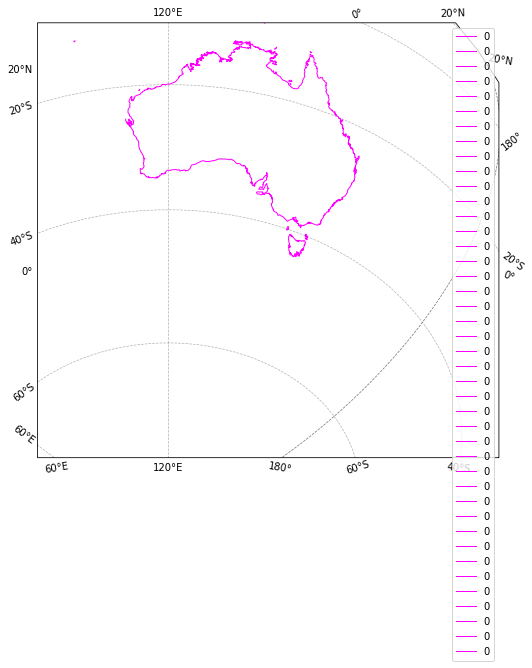

In [35]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER





fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, 
    projection=ccrs.Orthographic(central_longitude=120.0, central_latitude=-50.0))

ax.set_extent([100,180,-5,-70])

#ax.stock_img()
#ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), 
              linewidth=.7, color='black', alpha=0.3, linestyle='--', draw_labels=True)
    
rotation_model = pygplates.RotationModel('Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
coastlines = pygplates.FeatureCollection('Matthews_etal_GPC_2016_Coastlines.gpmlz')

start_time=0
end_time=10
time_step=10
time_list = range(start_time, end_time, time_step)

for time in time_list:
    rcsf = []
    pygplates.reconstruct(coastlines,rotation_model,rcsf,float(time))
    for rcs in rcsf:
        if rcs.get_feature().get_reconstruction_plate_id() in [801,850]:
            plt.plot(rcs.get_reconstructed_geometry().to_lat_lon_array()[:,1],
                     rcs.get_reconstructed_geometry().to_lat_lon_array()[:,0],
                     color=my_cmap((time-start_time)/(end_time-start_time)), 
                     linewidth=1,
                     transform=ccrs.Geodetic(), label=time)
    print(time)
    plt.legend()
    plt.xticks()